In [54]:
from sklearn.metrics import mean_squared_error

In [53]:
pip install yfinance

In [52]:
pip install pmdarima

In [55]:
import pandas as pd
import matplotlib as mt
import matplotlib.pyplot as plt
import numpy as np
import pmdarima as pm
import yfinance as yf
from sklearn.linear_model import LinearRegression
from dateutil.relativedelta import relativedelta
from pandas_datareader import data as pdr
import datetime
%matplotlib inline

In [56]:
yf.pdr_override()

In [57]:
syms = ['YESBANK.BO']

In [58]:
start = str(datetime.date.today() + relativedelta(years=-5))
yesd = pdr.get_data_yahoo(syms, start = start)
yesd.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-11,164.199997,164.639999,159.399994,159.679993,139.672577,1130235
2015-08-12,159.399994,159.399994,153.350006,154.070007,134.765503,1621550
2015-08-13,154.800003,156.839996,151.759995,152.789993,133.645874,1931035
2015-08-14,153.600006,159.740005,153.110001,159.339996,139.375168,1895990
2015-08-17,160.000000,160.630005,156.699997,158.119995,138.308044,936175


In [59]:
yesd.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-11,164.199997,164.639999,159.399994,159.679993,139.672577,1130235
2015-08-12,159.399994,159.399994,153.350006,154.070007,134.765503,1621550
2015-08-13,154.800003,156.839996,151.759995,152.789993,133.645874,1931035
2015-08-14,153.600006,159.740005,153.110001,159.339996,139.375168,1895990
2015-08-17,160.000000,160.630005,156.699997,158.119995,138.308044,936175


In [60]:
yesd.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [61]:
yesd = yesd.dropna() 
# droping the NA values

In [62]:
yesd.isna().sum()
# checking if there are any NAs

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [63]:
yesd.index = yesd.index.astype('datetime64[ns]')  
# converting the datatype of Date into datetime

In [64]:
from statsmodels.tsa.arima_model import ARIMA 
# for prediction of stock prices by training the data

In [65]:
yesd.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-11,164.199997,164.639999,159.399994,159.679993,139.672577,1130235
2015-08-12,159.399994,159.399994,153.350006,154.070007,134.765503,1621550
2015-08-13,154.800003,156.839996,151.759995,152.789993,133.645874,1931035
2015-08-14,153.600006,159.740005,153.110001,159.339996,139.375168,1895990
2015-08-17,160.000000,160.630005,156.699997,158.119995,138.308044,936175


In [66]:
yesd["2019-12"].Close.mean()    # finding mean

51.45238095238095

In [67]:
yesd["2019-12-01":"2019-12-07"]       # data in a given range

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-02,70.000000,70.500000,63.099998,64.050003,64.050003,25476054
2019-12-03,64.099998,65.349998,59.000000,59.500000,59.500000,22760247
2019-12-04,58.750000,63.450001,56.799999,63.049999,63.049999,29471027
2019-12-05,63.049999,64.000000,60.799999,62.099998,62.099998,19908604
2019-12-06,61.000000,61.000000,55.200001,56.000000,56.000000,21329180


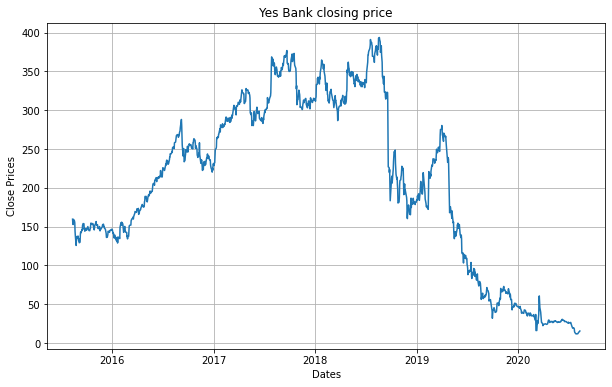

In [68]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(yesd['Close'])
plt.title('Yes Bank closing price')
plt.show()

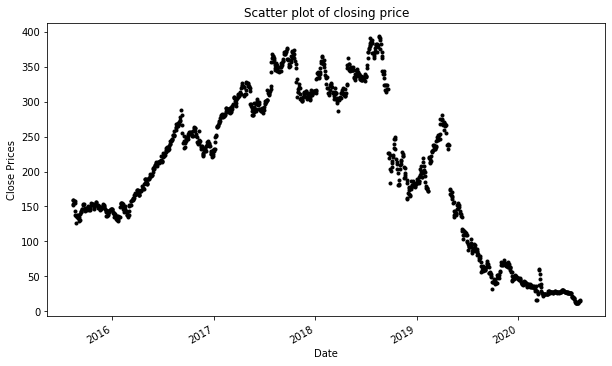

In [69]:
yesd_close = yesd['Close']
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
yesd_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

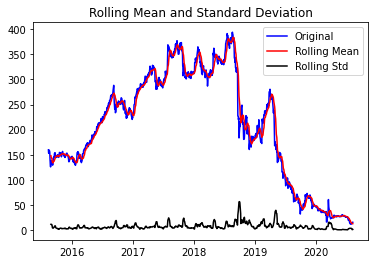

Results of dickey fuller test
Test Statistics                  -0.461531
p-value                           0.899307
No. of lags used                 10.000000
Number of observations used    1218.000000
critical value (1%)              -3.435730
critical value (5%)              -2.863916
critical value (10%)             -2.568035
dtype: float64


In [70]:
#Test for staionarity
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(yesd_close)

To accept the null hypothesis the Test Statistics Value should be greater than the Critical Values. So here in this particular case we are accepting the null hypothesis.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


<Figure size 432x288 with 0 Axes>

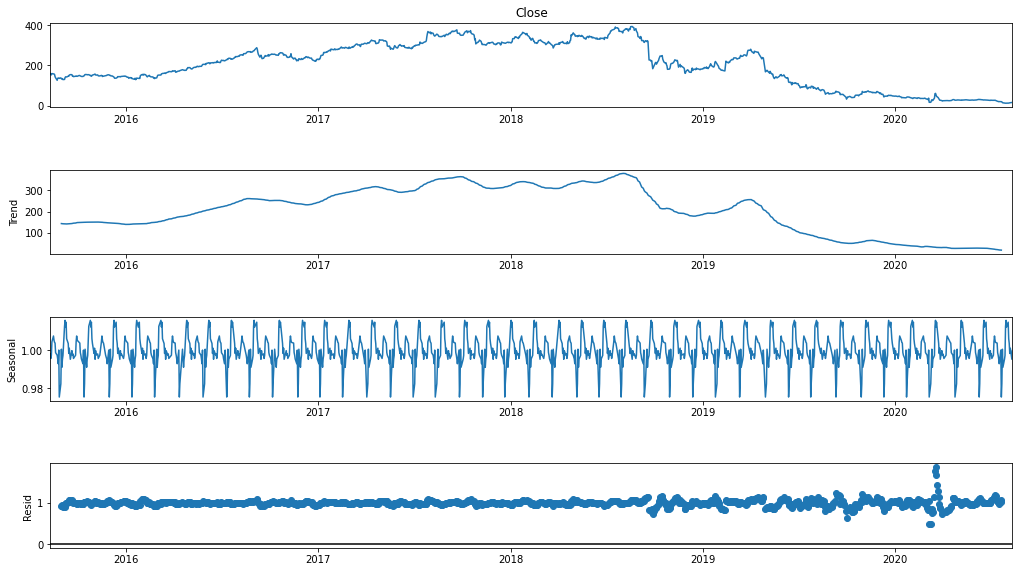

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(yesd_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

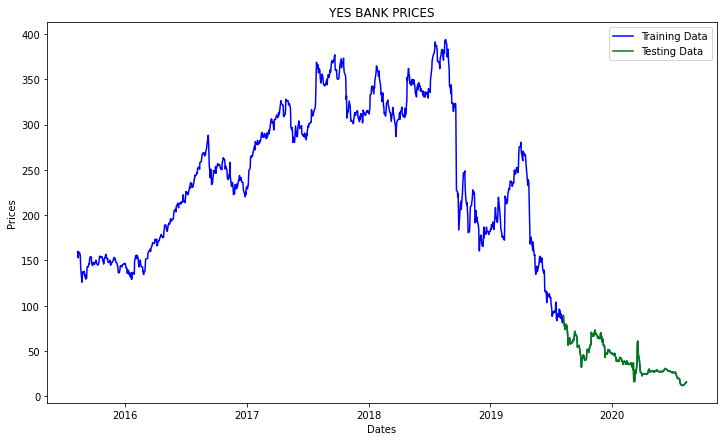

In [72]:
train_data, test_data = yesd[0:int(len(yesd)*0.8)], yesd[int(len(yesd)*0.8):]
plt.figure(figsize=(12,7))
plt.title('YES BANK PRICES')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(yesd['Close'], 'blue', label='Training Data')
plt.plot(test_data['Close'], 'green', label='Testing Data')

plt.legend()


In [73]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) +       np.abs(y_true))))


In [74]:
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 13.152
Symmetric mean absolute percentage error: 48.015


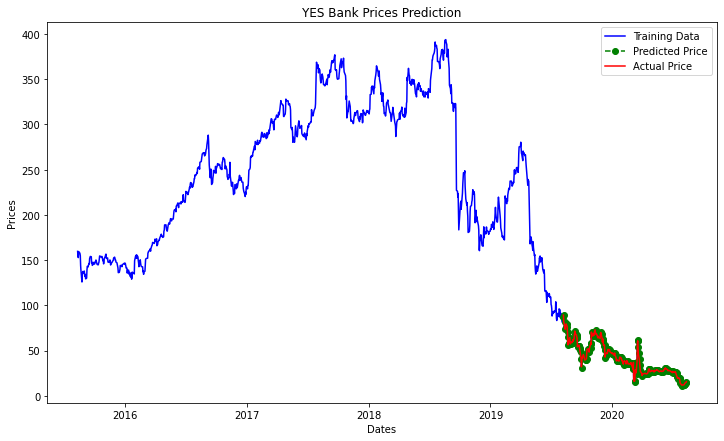

In [75]:
plt.figure(figsize=(12,7))
plt.plot(yesd['Close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('YES Bank Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()


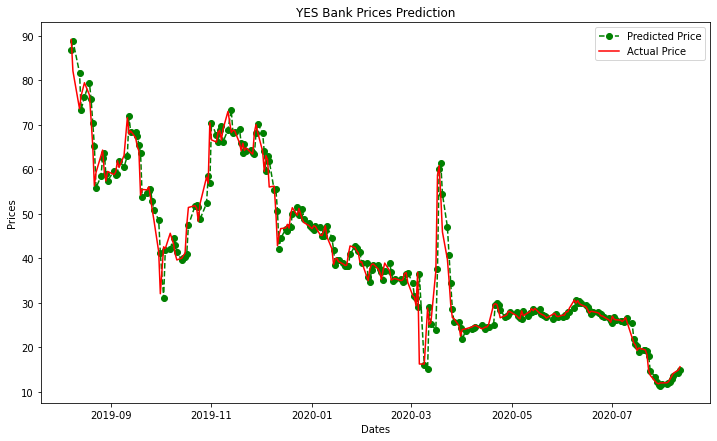

In [76]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.legend()
plt.title('YES Bank Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()